South Asia
Electricity Access VS GDP

## Load and Scaling Data

In [17]:
import os
path = r'C:\Users\nadda\Desktop\KU\01204314-65-Statistics-for-Computer-Engineering-Applications\week10'
data_path = os.path.join(path, "data")
processed_data_path = os.path.join(path, "processed_data")
os.chdir(path)
os.getcwd()

'C:\\Users\\nadda\\Desktop\\KU\\01204314-65-Statistics-for-Computer-Engineering-Applications\\week10'

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from pandas.plotting import scatter_matrix

In [19]:
df_regions = pd.read_excel(os.path.join(data_path, "countries_regions.xlsx"))
df_regions.reset_index(inplace=True)

df_gdp = pd.read_csv(os.path.join(processed_data_path, "gdp.csv"))

df_electricity = pd.read_csv(os.path.join(processed_data_path, "electricity.csv"))

South Asia
Western Asia
Southeast Asia
East Asia
North America
South America
Eastern Europe
Western Europe
Northern Europe
Australia and Oceanea
Africa
Middle East

In [20]:
# เลือกเฉพาะประเทศที่อยู่ในทวีปที่สนใจ
region = "South Asia"
region_countries = df_regions[df_regions["Region"] == region]["CountryName"].tolist()

# กรองเฉพาะคอลัมน์ GDP
columns_to_keep = ["Year"] + [country for country in region_countries if country in df_gdp.columns]
df_gdp = df_gdp[columns_to_keep]

# กรองเฉพาะคอลัมน์ GDP
columns_to_keep = ["Year"] + [country for country in region_countries if country in df_electricity.columns]
df_electricity = df_electricity[columns_to_keep]

#df_gdp.head()
df_gdp.head()

,Year,Afghanistan,Bangladesh,Bhutan,India,Maldives,Nepal,Pakistan,Sri Lanka
0,2001,2.813572e+09,5.399129e+10,496110225.7,4.850000e+11,8.700317e+08,6.007055e+09,9.714562e+10,1.574975e+10
1,2002,3.825701e+09,5.472408e+10,559345263.7,5.150000e+11,8.970312e+08,6.050876e+09,9.792330e+10,1.653654e+10
2,2003,4.520947e+09,6.015893e+10,651935430.3,6.080000e+11,1.052121e+09,6.330473e+09,1.120000e+11,1.888177e+10
3,2004,5.224897e+09,6.510854e+10,735348490.4,7.090000e+11,1.226830e+09,7.273938e+09,1.320000e+11,2.066253e+10
4,2005,6.203257e+09,6.947600e+10,860391000.2,8.200000e+11,1.163362e+09,8.130258e+09,1.450000e+11,2.440579e+10


In [21]:
import numpy as np

max_value = df_gdp.iloc[:, 1:].max().max()  # หาค่ามากที่สุด (ยกเว้น Year)
exp = np.floor(np.log10(max_value)) - 2
scale_factor = 10 ** exp  # ลดลงให้ค่ามากสุด ≈ 100

# แปลงค่าโดยหารด้วย scale_factor
df_gdp.iloc[:, 1:] = df_gdp.iloc[:, 1:] / scale_factor

#df_gdp.head(2)
exp = int(exp)
print(f"GDP Scaler = 10 ^ {exp}")

df_gdp_ori = df_gdp
df_electricity_ori = df_electricity

GDP Scaler = 10 ^ 10


## Exploratory Data Analysis

### Find mean, median and SD for each year

In [22]:
def wide_to_long_format(df):
    return df.melt(id_vars=["Year"], var_name="CountryName", value_name="Value")

def compute_statistics(df):
    df = wide_to_long_format(df)
    
    # คำนวณค่าทางสถิติที่สำคัญสำหรับ EDA
    df = df.groupby(["Year"])["Value"].agg(["mean", "median", "min", "max", "var", "std", "count"]).reset_index()
    
    # เปลี่ยนชื่อคอลัมน์ให้อ่านง่าย
    df.columns = ["Year", "Mean", "Median", "Min", "Max", "Variance", "Std Dev", "Count"]
    
    return df

In [23]:
df_electricity_region = compute_statistics(df_electricity)
df_electricity_region.head(20)

,Year,Mean,Median,Min,Max,Variance,Std Dev,Count
0,2001,49.5125,51.10,9.3,87.5,703.886964,26.530868,8
1,2002,54.8250,53.20,14.1,88.3,664.550714,25.778881,8
2,2003,55.7125,53.25,19.0,89.1,577.789821,24.037259,8
3,2004,57.6750,58.15,23.8,90.0,529.945000,23.020534,8
4,2005,61.8375,64.30,28.7,90.9,440.434107,20.986522,8
5,2006,64.4625,63.80,33.5,91.7,375.891250,19.387915,8
6,2007,66.8000,72.05,38.4,92.6,356.425714,18.879240,8
7,2008,69.0375,70.85,42.4,93.6,296.105536,17.207717,8
8,2009,72.5875,73.25,48.3,99.9,295.449821,17.188654,8
9,2010,73.4500,74.80,42.7,99.0,326.600000,18.072078,8


In [24]:
df_gdp_region = compute_statistics(df_gdp)
df_gdp_region.head(20)

,Year,Mean,Median,Min,Max,Variance,Std Dev,Count
0,2001,8.275918,1.087840,0.049611,48.5,275.825337,16.607990,8
1,2002,8.693961,1.129371,0.055935,51.5,310.952224,17.633837,8
2,2003,10.144952,1.260612,0.065194,60.8,434.156601,20.836425,8
3,2004,11.765401,1.396823,0.073535,70.9,591.590841,24.322641,8
4,2005,13.440488,1.626802,0.086039,82.0,792.052647,28.143430,8
5,2006,15.257614,1.866176,0.094288,94.0,1042.423314,32.286581,8
6,2007,19.239494,2.133793,0.125577,122.0,1762.458212,41.981641,8
7,2008,19.507434,2.662963,0.131752,120.0,1695.276358,41.173734,8
8,2009,21.250175,2.746060,0.133134,134.0,2116.876145,46.009522,8
9,2010,26.084464,3.731941,0.167346,168.0,3334.385435,57.744138,8


### Boxplot

In [25]:
val1 = "Electricity Access (%)"
val2 = f"GDP (10^{exp} USD)"

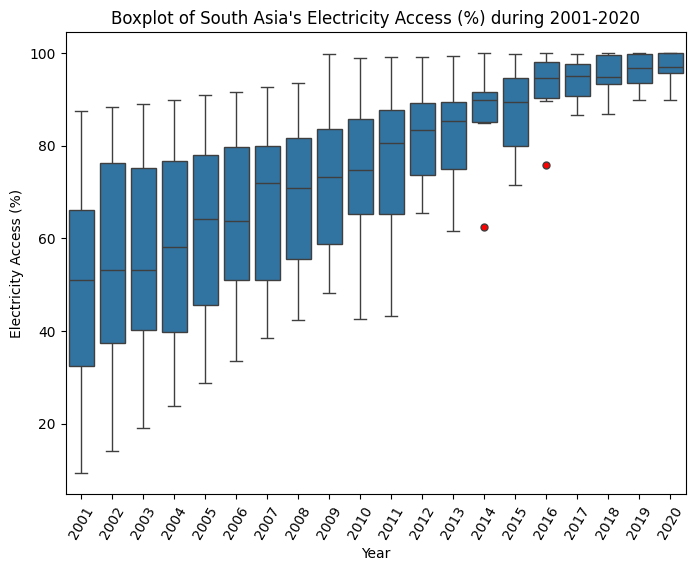

In [26]:
df_electricity = df_electricity.melt(id_vars=["Year"], var_name="Country", value_name=val1)
df_gdp = df_gdp.melt(id_vars=["Year"], var_name="Country", value_name=val2)

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_electricity[val1], x=df_electricity["Year"],
            showfliers=True,
            flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 5})

# ตั้งชื่อกราฟ
plt.ylabel(val1)
plt.xlabel("Year")
plt.title(f"Boxplot of {region}'s {val1} during 2001-2020")
plt.xticks(rotation=60)

# แสดงกราฟ
plt.show()

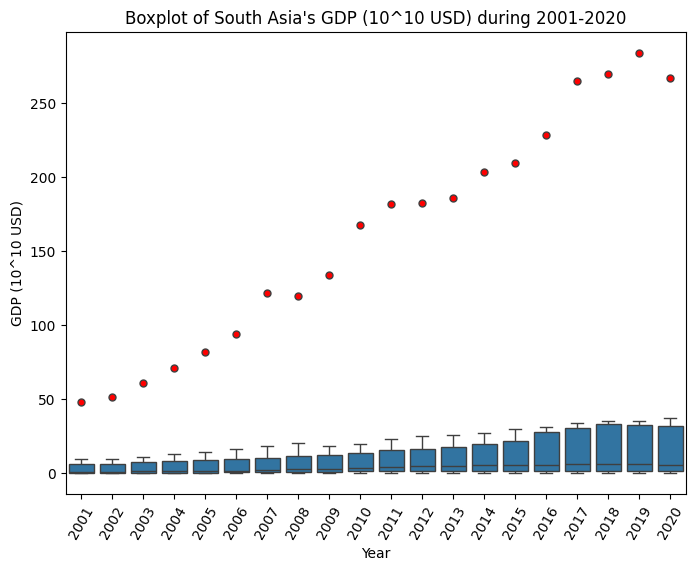

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_gdp[val2], x=df_gdp["Year"],
            showfliers=True,
            flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 5})

# ตั้งชื่อกราฟ
plt.ylabel(val2)
plt.xlabel("Year")
plt.title(f"Boxplot of {region}'s {val2} during 2001-2020")
plt.xticks(rotation=60)

# แสดงกราฟ
plt.show()

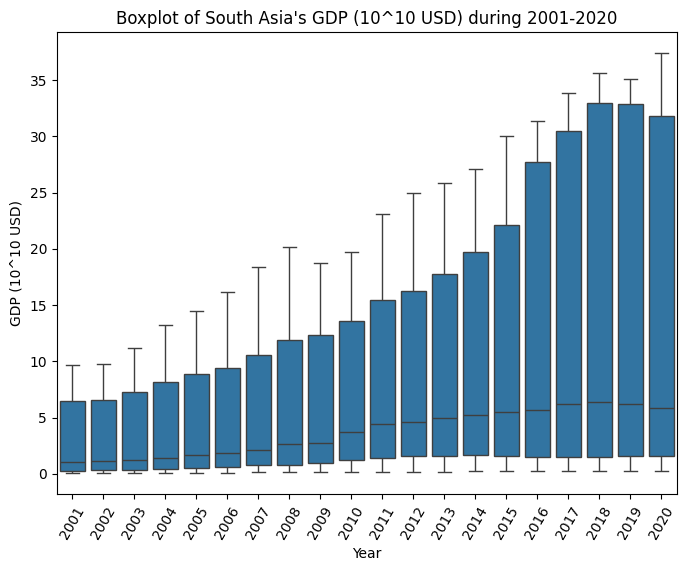

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_gdp[val2], x=df_gdp["Year"], showfliers=False)

# ตั้งชื่อกราฟ
plt.ylabel(val2)
plt.xlabel("Year")
plt.title(f"Boxplot of {region}'s {val2} during 2001-2020")
plt.xticks(rotation=60)

# แสดงกราฟ
plt.show()

### Trends

In [29]:
def show_trend(df,Title):
    plt.plot(df["Year"], df["Mean"], label="Mean", marker="o", linestyle="-", color="blue")
    plt.plot(df["Year"], df["Median"], label="Median", marker="s", linestyle="--", color="orange")
    plt.plot(df["Year"], df["Std Dev"], label="Std Dev", marker="^", linestyle="-.", color="green")
    plt.title(f"Trend of {region}'s {Title}")
    plt.xticks(ticks=df["Year"], labels=df["Year"], rotation=60)
    plt.legend(fontsize=10, loc='best', ncol=3)
    plt.grid(True)
    plt.show()

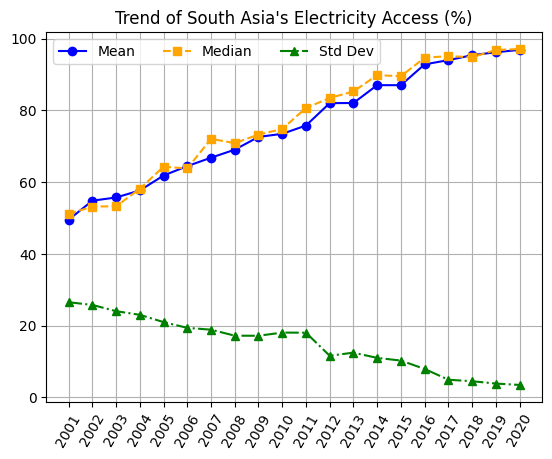

In [30]:
show_trend(df_electricity_region, val1)

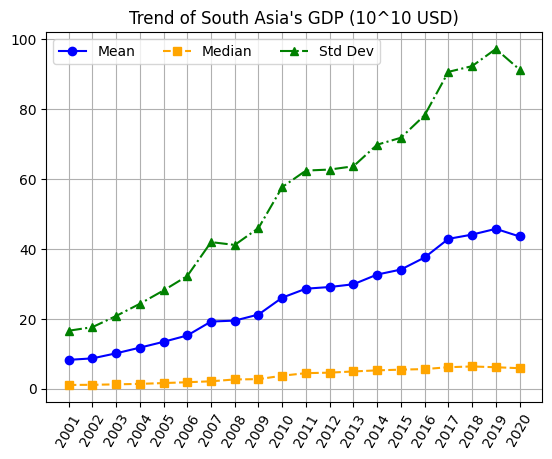

In [31]:
show_trend(df_gdp_region, val2)

### Correlation

In [32]:
def show_scatterplot(df1, df2, opt):
    # รวมข้อมูลเข้าด้วยกัน (Merge ตาม Country และ Year)
    df_merged = df1.merge(df2, on=["Year", "Country"])

    # เลือกเฉพาะคอลัมน์ที่ต้องการ และเรียงลำดับปีใหม่ให้อยู่ข้างหน้า
    df_selected = df_merged[[opt, val1, val2]]

    # สร้าง Scatter Plot
    plt.figure(figsize=(10, 6))

    if opt == "Year":
        p = "viridis"
    elif opt == "Country":
        p = "tab10"

    sns.scatterplot(
        x=df_selected[val2], 
        y=df_selected[val1],
        hue=df_selected[opt],  # ให้สีแยกตามปี
        palette=p,
        s=80, alpha=0.7  # ขนาดจุดและความโปร่งใส
    )

    # ตั้งชื่อกราฟ
    plt.xlabel(val2)
    plt.ylabel(val1)
    plt.title(f"Scatter Plot of {val2} vs {val1} in {region} by {opt}")

    # แสดง Legend นอกกราฟ
    plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')

    # แสดงกราฟ
    plt.show()

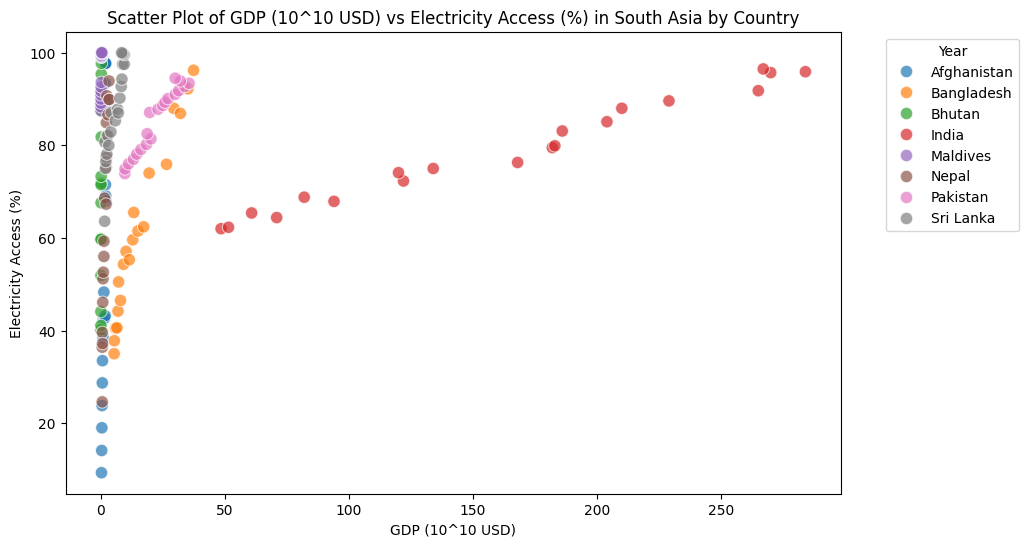

In [33]:
show_scatterplot(df_gdp, df_electricity, "Country")

In [34]:
df_merged = df_electricity.merge(df_gdp, on=["Year", "Country"])
#df_merged.head(5)

In [35]:
def calculate_correlation(df, method="overall"):
    if method == "overall":
        correlation = df[[val2, val1]].corr()
        return correlation

    elif method == "by_year":
        correlation_by_year = df.groupby("Year")[[val2, val1]].corr().unstack().iloc[:, 1]
        return correlation_by_year

    elif method == "by_country":
        correlation_by_country = df.groupby("Country")[[val2, val1]].corr().unstack().iloc[:, 1]
        return correlation_by_country

    else:
        raise ValueError("Invalid method. Choose 'overall', 'by_year', or 'by_country'.")

In [36]:
'''# 1️⃣ Correlation ทั้ง Dataset
overall_corr = calculate_correlation(df_merged, "overall")
print("Overall Correlation:")
print(overall_corr)'''

'''# 2️⃣ Correlation รายปี
yearly_corr = calculate_correlation(df_merged, "by_year")
print("\nYearly Correlation:")
print(yearly_corr)'''

'''# 3️⃣ Correlation รายประเทศ
country_corr = calculate_correlation(df_merged, "by_country")
print("\nCountry-wise Correlation:")
print(country_corr)'''

'# 3️⃣ Correlation รายประเทศ\ncountry_corr = calculate_correlation(df_merged, "by_country")\nprint("\nCountry-wise Correlation:")\nprint(country_corr)'

### Distribution

In [37]:
def distribution_by_country(df, val):
    df["Country"] = df["Country"].astype(str)

    # 🔹 สร้าง KDE Plot
    plt.figure(figsize=(12, 6))
    ax = sns.kdeplot(
        data=df, 
        x=val, 
        hue="Country", 
        palette="tab10",  # 🔹 ใช้ tab10 เพื่อให้สีไม่ซ้ำกัน
        fill=True, 
        alpha=0.6
    )

    # ตั้งชื่อกราฟ
    plt.xlabel(val)
    plt.ylabel("Density")
    plt.title(f"Distribution of {val} by Country")

    # 🔹 ตรวจสอบว่า Legend ถูกสร้างขึ้นหรือไม่
    if ax.get_legend() is None:
        plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        handles, labels = ax.get_legend_handles_labels()
        if labels:  # ถ้ามี labels ให้ update legend
            plt.legend(handles, labels, title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

    # แสดงกราฟ
    plt.show()

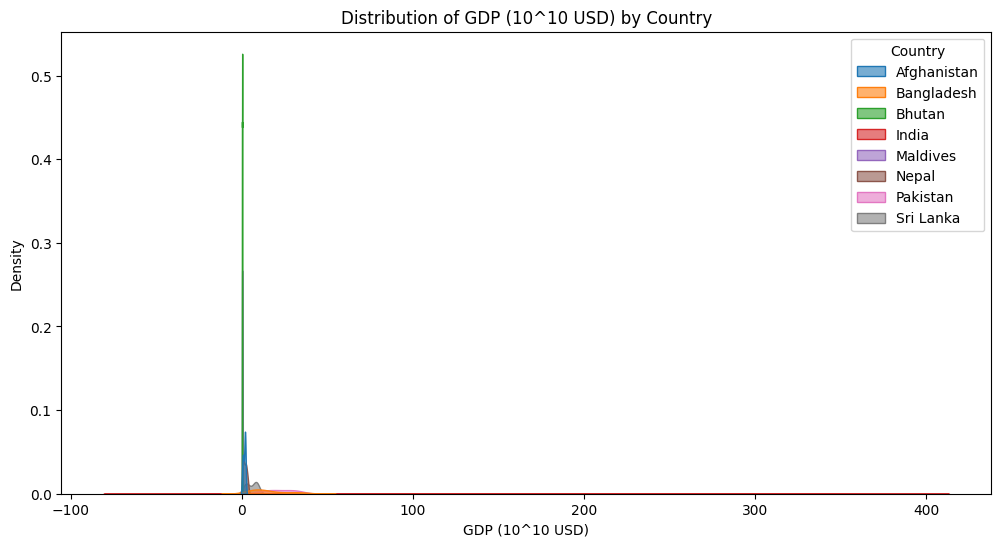

In [38]:
distribution_by_country(df_gdp, val2)
#distribution_by_country(df_electricity, val1)

In [39]:
def distribution_by_year(df, val):
    # 🔹 แปลงให้คอลัมน์ "Year" เป็น string เพื่อใช้เป็น hue
    df["Year"] = df["Year"].astype(str)

    # 🔹 สร้าง KDE Plot
    plt.figure(figsize=(12, 6))
    ax = sns.kdeplot(
        data=df, 
        x=val, 
        hue="Year", 
        palette="coolwarm",  # 🔹 ใช้ coolwarm เพื่อให้แยกสีตามปีชัดเจน
        fill=True, 
        alpha=0.5
    )

    # ตั้งชื่อกราฟ
    plt.xlabel(val)
    plt.ylabel("Density")
    plt.title(f"Distribution of {val} by Year")

    # 🔹 ตรวจสอบว่า Legend ถูกสร้างขึ้นหรือไม่
    if ax.get_legend() is None:
        plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        handles, labels = ax.get_legend_handles_labels()
        if labels:  # ถ้ามี labels ให้ update legend
            plt.legend(handles, labels, title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')

    # แสดงกราฟ
    plt.show()

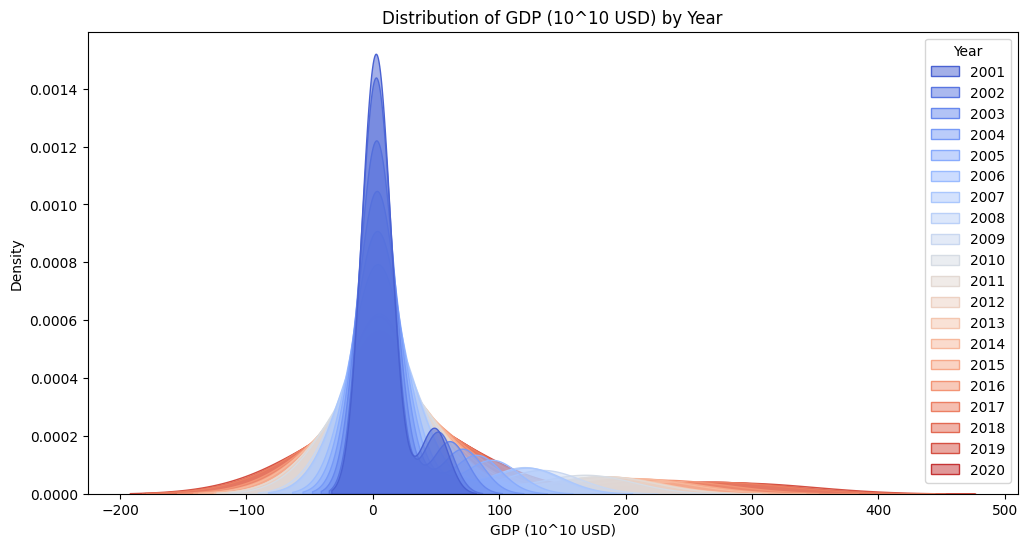

In [40]:
distribution_by_year(df_gdp, val2)
#distribution_by_year(df_electricity, val1)

## Timeseries Data Analysis

### Remove Outlier

In [41]:
from scipy.stats import zscore

df_electricity = df_electricity_ori
df_gdp = df_gdp_ori

def remove_outliers(df, z_threshold=3.0, impute_with="median"):
    # 1) แปลงเป็น Long Format
    df_melted = df.melt(id_vars=["Year"], var_name="Country", value_name="Value")
    
    # 2) groupby แค่ Year เพื่อหาค่า Q1, Q3
    iqr_stats = df_melted.groupby("Year")["Value"].agg(
        Q1=lambda x: x.quantile(0.2),
        Q3=lambda x: x.quantile(0.8),
        median="median"   # เก็บ median ไว้ด้วย
    ).reset_index()
    
    # 3) คำนวณ IQR กับ Boundaries
    iqr_stats["IQR"] = iqr_stats["Q3"] - iqr_stats["Q1"]
    iqr_stats["Lower_Bound"] = iqr_stats["Q1"] - 1.5 * iqr_stats["IQR"]
    iqr_stats["Upper_Bound"] = iqr_stats["Q3"] + 1.5 * iqr_stats["IQR"]
    
    # 4) Merge เพื่อนำค่าพวกนี้ไปใช้
    df_merged = df_melted.merge(iqr_stats, on="Year", how="left")
    
    # 5) แทนที่ Outlier ด้วย median ของปีนั้น
    is_outlier = (df_merged["Value"] < df_merged["Lower_Bound"]) | (df_merged["Value"] > df_merged["Upper_Bound"])
    
    df_merged.loc[is_outlier, "Value"] = df_merged.loc[is_outlier, "median"]
    
    # 6) Pivot กลับเป็น Wide Format
    df_cleaned = df_merged.pivot(index="Year", columns="Country", values="Value").reset_index()
    
    return df_cleaned

df_gdp = remove_outliers(df_gdp)
df_electricity = remove_outliers(df_electricity)

In [42]:
# Before remove outlier
df_gdp_ori.head(20)
#df_electricity_ori.head(20)

,Year,Afghanistan,Bangladesh,Bhutan,India,Maldives,Nepal,Pakistan,Sri Lanka
0,2001,0.281357,5.399129,0.049611,48.5,0.087003,0.600706,9.714562,1.574975
1,2002,0.382570,5.472408,0.055935,51.5,0.089703,0.605088,9.792330,1.653654
2,2003,0.452095,6.015893,0.065194,60.8,0.105212,0.633047,11.200000,1.888177
3,2004,0.522490,6.510854,0.073535,70.9,0.122683,0.727394,13.200000,2.066253
4,2005,0.620326,6.947600,0.086039,82.0,0.116336,0.813026,14.500000,2.440579
5,2006,0.697176,7.179574,0.094288,94.0,0.157520,0.904372,16.200000,2.827980
6,2007,0.974789,7.961164,0.125577,122.0,0.186838,1.032562,18.400000,3.235024
7,2008,1.010930,9.163700,0.131752,120.0,0.227165,1.254544,20.200000,4.071383
8,2009,1.241615,10.200000,0.133134,134.0,0.234529,1.285499,18.700000,4.206622
9,2010,1.585667,11.500000,0.167346,168.0,0.258818,1.600266,19.700000,5.863616


In [43]:
# After remove outlier
df_gdp.head(20)
#df_electricity.head(20)

Country,Year,Afghanistan,Bangladesh,Bhutan,India,Maldives,Nepal,Pakistan,Sri Lanka
0,2001,0.281357,5.399129,0.049611,1.087840,0.087003,0.600706,9.714562,1.574975
1,2002,0.382570,5.472408,0.055935,1.129371,0.089703,0.605088,9.792330,1.653654
2,2003,0.452095,6.015893,0.065194,1.260612,0.105212,0.633047,11.200000,1.888177
3,2004,0.522490,6.510854,0.073535,1.396823,0.122683,0.727394,13.200000,2.066253
4,2005,0.620326,6.947600,0.086039,1.626802,0.116336,0.813026,14.500000,2.440579
5,2006,0.697176,7.179574,0.094288,1.866176,0.157520,0.904372,16.200000,2.827980
6,2007,0.974789,7.961164,0.125577,2.133793,0.186838,1.032562,18.400000,3.235024
7,2008,1.010930,9.163700,0.131752,2.662963,0.227165,1.254544,20.200000,4.071383
8,2009,1.241615,10.200000,0.133134,2.746060,0.234529,1.285499,18.700000,4.206622
9,2010,1.585667,11.500000,0.167346,3.731941,0.258818,1.600266,19.700000,5.863616


### Decomposition

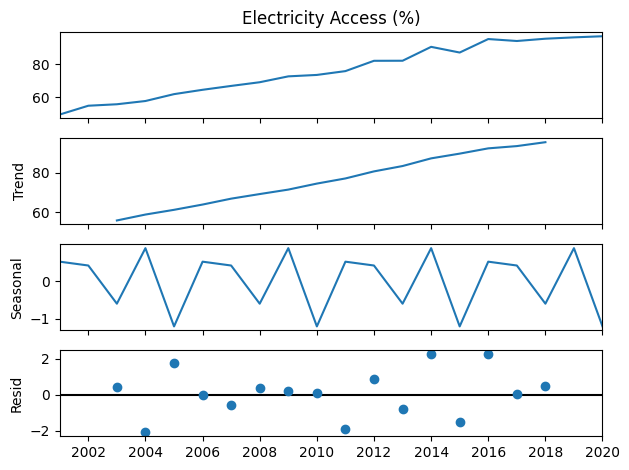

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_electricity_region = compute_statistics(df_electricity)
                                   
e_period = 5

df_e = df_electricity_region[["Year", "Mean"]]
df_e = df_e.rename(columns={"Mean": val1})
df_e['Year'] = pd.to_datetime(df_e['Year'], format='%Y')
df_e.set_index('Year',inplace=True)
ts_electricity = df_e[val1]

result = seasonal_decompose(df_e[val1], period=e_period)
result.plot()
plt.show()

In [45]:
df_e.head()

,Electricity Access (%)
Year,
2001-01-01,49.5125
2002-01-01,54.8250
2003-01-01,55.7125
2004-01-01,57.6750
2005-01-01,61.8375


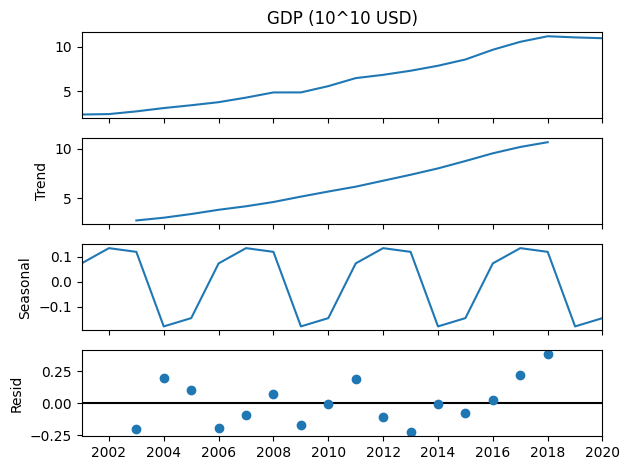

In [46]:
df_gdp_region = compute_statistics(df_gdp)

g_period = 5

df_g = df_gdp_region[["Year", "Mean"]]
df_g = df_g.rename(columns={"Mean": val2})
df_g['Year'] = pd.to_datetime(df_g['Year'], format='%Y')
df_g.set_index('Year',inplace=True)
ts_gdp = df_g[val2]

result = seasonal_decompose(df_g[val2], period=g_period)
result.plot()
plt.show()

In [47]:
df_g

,GDP (10^10 USD)
Year,
2001-01-01,2.349398
2002-01-01,2.397632
2003-01-01,2.702529
2004-01-01,3.077504
2005-01-01,3.393839
2006-01-01,3.740886
2007-01-01,4.256218
2008-01-01,4.840304
2009-01-01,4.843433


### Stationary Test

In [48]:
from statsmodels.tsa.stattools import adfuller

def check_adfuller(time_series, alpha=0.05):
    """
    Function to check whether timeseries is stationary or not
    Pass in a time series, returns adfuller test result
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= alpha:
        print("Reject the null hypothesis. Data is stationary")
    else:
        print("Do not reject the null hypothesis. Data is not stationary ")

# ทดสอบ Stationarity
check_adfuller(ts_electricity)
print()
check_adfuller(ts_gdp)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.3047746593657197
p-value : 0.6269850799475101
#Lags Used : 1
Number of Observations Used : 18
Do not reject the null hypothesis. Data is not stationary 

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.76981686355464
p-value : 0.8278277801660372
#Lags Used : 1
Number of Observations Used : 18
Do not reject the null hypothesis. Data is not stationary 


In [49]:
ts_gdp.head(20)

Year
2001-01-01     2.349398
2002-01-01     2.397632
2003-01-01     2.702529
2004-01-01     3.077504
2005-01-01     3.393839
2006-01-01     3.740886
2007-01-01     4.256218
2008-01-01     4.840304
2009-01-01     4.843433
2010-01-01     5.550957
2011-01-01     6.456358
2012-01-01     6.824484
2013-01-01     7.288735
2014-01-01     7.851775
2015-01-01     8.558391
2016-01-01     9.658173
2017-01-01    10.552287
2018-01-01    11.180612
2019-01-01    11.050787
2020-01-01    10.959163
Name: GDP (10^10 USD), dtype: float64

In [50]:
# Differencing
ts_diff_electricity = ts_electricity.diff().dropna()
ts_electricity = ts_diff_electricity

ts_diff_gdp = ts_gdp.diff().dropna()
ts_diff_gdp = ts_diff_gdp.diff().dropna()
ts_diff_gdp = ts_diff_gdp.diff().dropna()
ts_diff_gdp = ts_diff_gdp.diff().dropna()
ts_gdp = ts_diff_gdp

check_adfuller(ts_electricity)
print()
check_adfuller(ts_gdp)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -9.90827440186788
p-value : 3.2197184164838025e-17
#Lags Used : 0
Number of Observations Used : 18
Reject the null hypothesis. Data is stationary

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.4219848675757385
p-value : 3.0450692930996888e-06
#Lags Used : 6
Number of Observations Used : 9
Reject the null hypothesis. Data is stationary


### Autocorrelation & Partial Autocorrelation

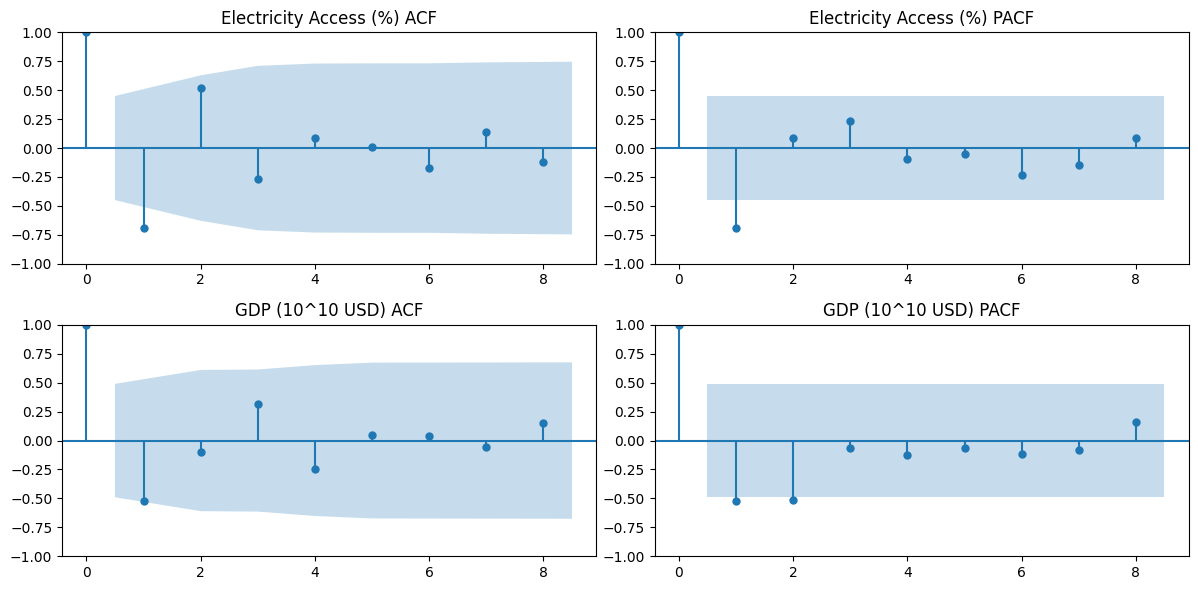

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plot_acf(ts_diff_electricity, lags=8, ax=plt.gca(), title=f"{val1} ACF")
plt.subplot(2,2,2)
plot_pacf(ts_diff_electricity, lags=8, ax=plt.gca(), title=f"{val1} PACF")

plt.subplot(2,2,3)
plot_acf(ts_diff_gdp, lags=8, ax=plt.gca(), title=f"{val2} ACF")
plt.subplot(2,2,4)
plot_pacf(ts_diff_gdp, lags=8, ax=plt.gca(), title=f"{val2} PACF")

plt.tight_layout()
plt.show()

### Seasonal Stationery Test

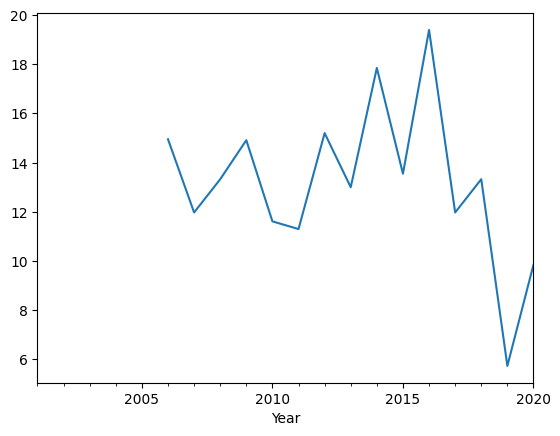

In [52]:
original_seasonal_difference_e = df_e[val1] - df_e[val1].shift(5)
original_seasonal_difference_e.plot()
plt.show()

In [53]:
original_seasonal_difference_e

Year
2001-01-01         NaN
2002-01-01         NaN
2003-01-01         NaN
2004-01-01         NaN
2005-01-01         NaN
2006-01-01    14.95000
2007-01-01    11.97500
2008-01-01    13.32500
2009-01-01    14.91250
2010-01-01    11.61250
2011-01-01    11.30000
2012-01-01    15.20000
2013-01-01    13.00000
2014-01-01    17.85000
2015-01-01    13.55000
2016-01-01    19.39375
2017-01-01    11.97500
2018-01-01    13.32500
2019-01-01     5.73750
2020-01-01     9.85000
Name: Electricity Access (%), dtype: float64

In [54]:
original_seasonal_difference_e = original_seasonal_difference_e.dropna()
check_adfuller(original_seasonal_difference_e)
De = 1

Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.329668767955432
p-value : 0.0003944977445809967
#Lags Used : 5
Number of Observations Used : 9
Reject the null hypothesis. Data is stationary


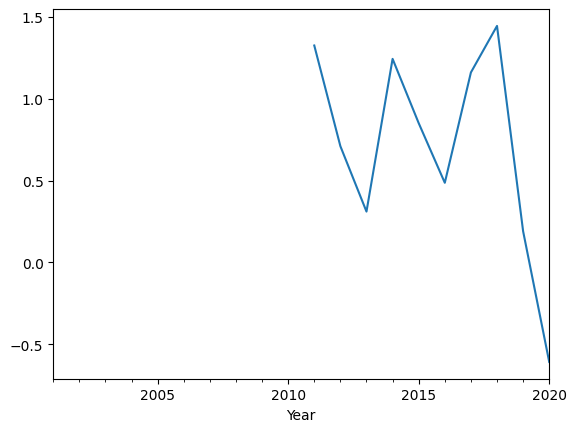

In [55]:
original_seasonal_difference_g = df_g[val2] - df_g[val2].shift(5)
original_seasonal_difference_g = original_seasonal_difference_g - original_seasonal_difference_g.shift(5)
original_seasonal_difference_g.plot()
plt.show()

In [56]:
original_seasonal_difference_g = original_seasonal_difference_g.dropna()
check_adfuller(original_seasonal_difference_g)
Dg=2

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.53997085927539
p-value : 0.0070179735208249355
#Lags Used : 1
Number of Observations Used : 8
Reject the null hypothesis. Data is stationary


### ARIMA Model

In [57]:
df_e

,Electricity Access (%)
Year,
2001-01-01,49.51250
2002-01-01,54.82500
2003-01-01,55.71250
2004-01-01,57.67500
2005-01-01,61.83750
2006-01-01,64.46250
2007-01-01,66.80000
2008-01-01,69.03750
2009-01-01,72.58750


In [58]:
df_g

,GDP (10^10 USD)
Year,
2001-01-01,2.349398
2002-01-01,2.397632
2003-01-01,2.702529
2004-01-01,3.077504
2005-01-01,3.393839
2006-01-01,3.740886
2007-01-01,4.256218
2008-01-01,4.840304
2009-01-01,4.843433


In [59]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# คราวนี้ลอง
trained_dfe = df_e.asfreq(df_e.index.inferred_freq, method='ffill')

# Run ARIMA with p = 0, q = 0
modele = ARIMA(trained_dfe.dropna(), order=(0,1,0))
resulte = modele.fit()
print(resulte.summary())

                                 SARIMAX Results                                  
Dep. Variable:     Electricity Access (%)   No. Observations:                   20
Model:                     ARIMA(0, 1, 0)   Log Likelihood                 -52.467
Date:                    Fri, 21 Feb 2025   AIC                            106.933
Time:                            07:46:03   BIC                            107.878
Sample:                        01-01-2001   HQIC                           107.093
                             - 01-01-2020                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        14.6572      4.692      3.124      0.002       5.460      23.854
Ljung-Box (L1) (Q):                  10.57   Jarque-Bera (JB):                 0.45
Prob(Q):       

In [60]:
de=1

In [61]:
# Run ARIMA models with different values of p and q.  
# The best model is the one with lowest AIC 

model1 = ARIMA(trained_dfe,order=(0,de,0))
result1 = model1.fit()
print(result1.aic)
model2 = ARIMA(trained_dfe,order=(1,de,1))
result2 = model2.fit()
print(result2.aic)
model3 = ARIMA(trained_dfe,order=(0,de,1))
result3 = model3.fit()
print(result3.aic)
model4 = ARIMA(trained_dfe,order=(1,de,0))
result4 = model4.fit()
print(result4.aic)

106.93345129470313
104.07790977090511
108.93317936557052
108.93277822416637


c:\Users\nadda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [62]:
pe = 1
qe = 1

In [63]:
# คราวนี้ลอง
trained_dfg = df_g.asfreq(df_g.index.inferred_freq, method='ffill')

# Run ARIMA with p = 0, q = 0
modelg = ARIMA(trained_dfg.dropna(), order=(0,1,0))
resultg = modele.fit()
print(resultg.summary())

                                 SARIMAX Results                                  
Dep. Variable:     Electricity Access (%)   No. Observations:                   20
Model:                     ARIMA(0, 1, 0)   Log Likelihood                 -52.467
Date:                    Fri, 21 Feb 2025   AIC                            106.933
Time:                            07:46:04   BIC                            107.878
Sample:                        01-01-2001   HQIC                           107.093
                             - 01-01-2020                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        14.6572      4.692      3.124      0.002       5.460      23.854
Ljung-Box (L1) (Q):                  10.57   Jarque-Bera (JB):                 0.45
Prob(Q):       

In [64]:
# Run ARIMA models with different values of p and q.  
# The best model is the one with lowest AIC 

model1 = ARIMA(trained_dfg.dropna(),order=(0,4,0))
result1 = model1.fit()
print(result1.aic)
model2 = ARIMA(trained_dfg.dropna(),order=(1,4,1))
result2 = model2.fit()
print(result2.aic)
model3 = ARIMA(trained_dfg.dropna(),order=(0,4,1))
result3 = model3.fit()
print(result3.aic)
model4 = ARIMA(trained_dfg.dropna(),order=(1,4,0))
result4 = model4.fit()
print(result4.aic)

43.57339415495251
31.65758242433794


c:\Users\nadda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\nadda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


32.505934318511336
39.90916787590796


In [65]:
dg = 4

In [66]:
pg = 0
qg = 2

### SARIMA Model

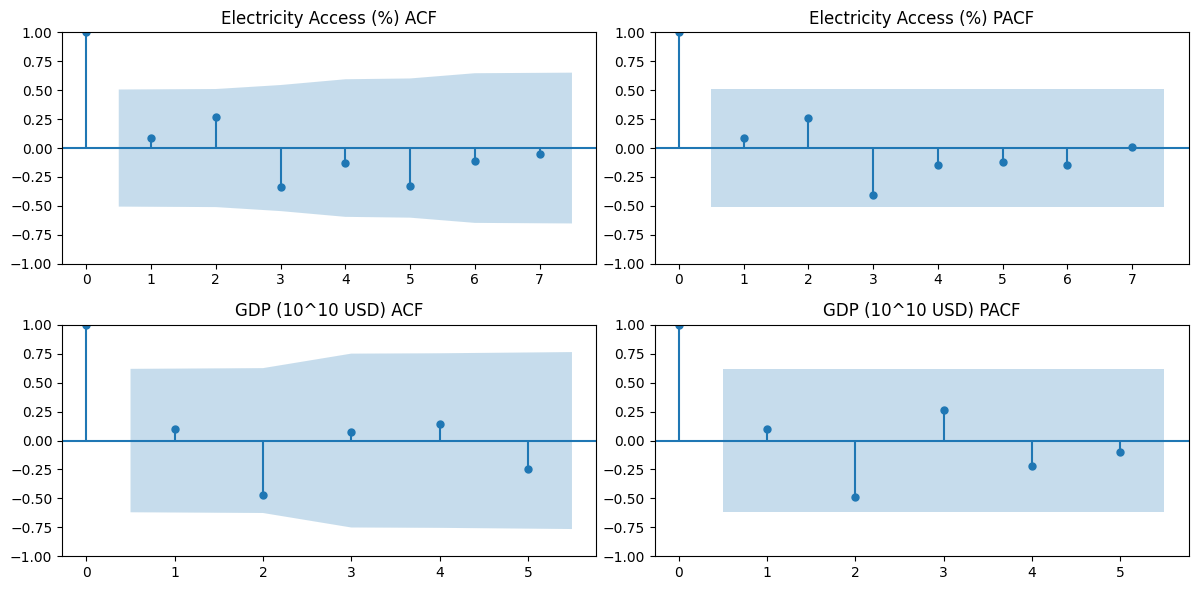

In [67]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plot_acf(original_seasonal_difference_e, lags=7, ax=plt.gca(), title=f"{val1} ACF")
plt.subplot(2,2,2)
plot_pacf(original_seasonal_difference_e, lags=7, ax=plt.gca(), title=f"{val1} PACF")

plt.subplot(2,2,3)
plot_acf(original_seasonal_difference_g, lags=5, ax=plt.gca(), title=f"{val2} ACF")
plt.subplot(2,2,4)
plot_pacf(original_seasonal_difference_g, lags=5, ax=plt.gca(), title=f"{val2} PACF")

plt.tight_layout()
plt.show()

In [68]:
Pe = 0
Qe = 0
Pg = 0
Qg = 0

In [69]:
# Run ARIMA with p = 0, q = 0
modele = SARIMAX(trained_dfe, order=(pe,de,qe), seasonal_order=(Pe,De,Qe,e_period))
resulte = modele.fit()
print(resulte.summary())

                                     SARIMAX Results                                      
Dep. Variable:             Electricity Access (%)   No. Observations:                   20
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 5)   Log Likelihood                 -34.990
Date:                            Fri, 21 Feb 2025   AIC                             75.980
Time:                                    07:46:05   BIC                             77.898
Sample:                                01-01-2001   HQIC                            75.803
                                     - 01-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9036      0.174     -5.203      0.000      -1.244      -0.563
ma.L1          0.4399      0.400   

c:\Users\nadda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [70]:
# Run ARIMA with p = 0, q = 0
modelg = SARIMAX(trained_dfg, order=(pg,dg,qg), seasonal_order=(Pg,Dg,Qg,g_period))
resultg = modelg.fit()
print(resultg.summary())

c:\Users\nadda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                    GDP (10^10 USD)   No. Observations:                   20
Model:             SARIMAX(0, 4, 2)x(0, 2, [], 5)   Log Likelihood                 -11.616
Date:                            Fri, 21 Feb 2025   AIC                             29.232
Time:                                    07:46:05   BIC                             28.608
Sample:                                01-01-2001   HQIC                            26.732
                                     - 01-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.7723     27.580     -0.064      0.949     -55.827      52.283
ma.L2          0.9806     29.330   

### Prediction

In [71]:
df_e.shape

(20, 1)

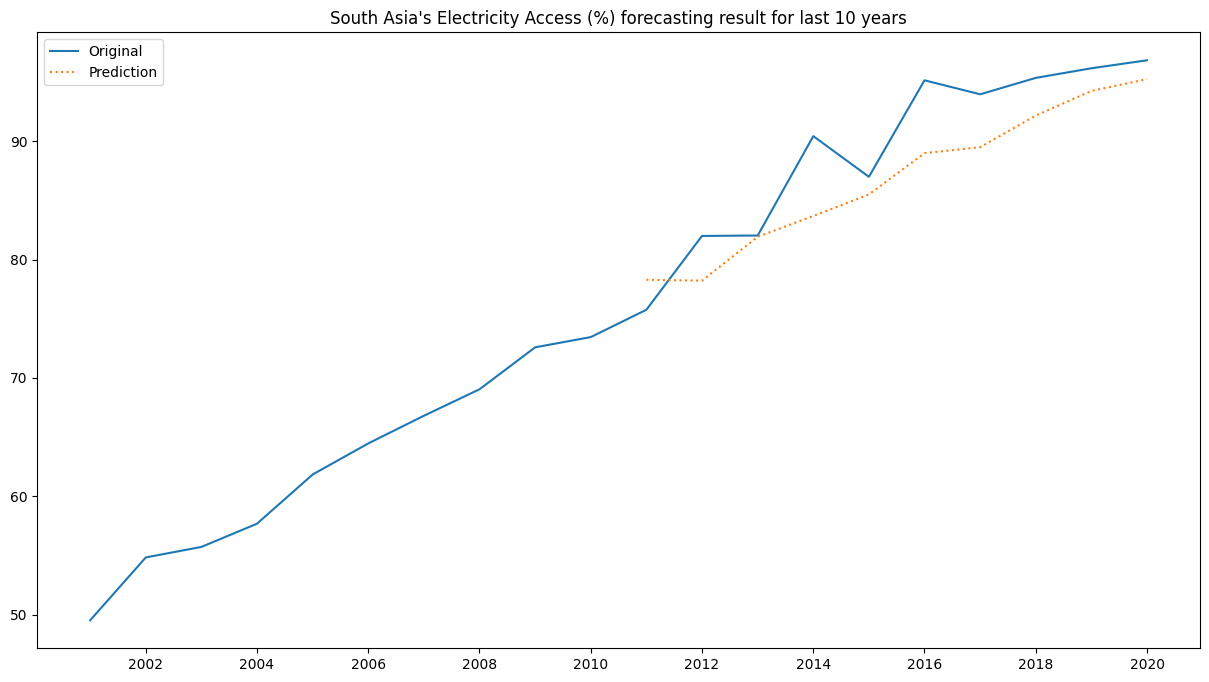

In [72]:
modele = SARIMAX(trained_dfe.dropna(), order=(pe,de+1,qe), seasonal_order=(Pe,De,Qe,e_period))
resulte = modele.fit()

# Predict
predict_count = 10
predict_values = resulte.predict(start = 20-predict_count, end= 19, dynamic= True)  

# Plot the actual and the predicted values
fig = plt.figure(figsize=(15,8)) 
plt.plot(df_e[val1])              
plt.plot(df_e.index[-predict_count:], predict_values, ':')
plt.title(f"{region}'s {val1} forecasting result for last {predict_count} years")
plt.legend(['Original','Prediction'],loc='upper left')
plt.show()

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
actual_values = df_e[val1][-predict_count:]
mae = mean_absolute_error(actual_values, predict_values)
mse = mean_squared_error(actual_values, predict_values)
rmse = np.sqrt(mse)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 3.198058723589965
MSE: 14.270091071695342
RMSE: 3.7775774077701363


In [74]:
# Predict the future values
modele = SARIMAX(trained_dfe.dropna(), order=(pe,de,qe), seasonal_order=(Pe,De,Qe,e_period))
resulte = modele.fit()

# Predict the next 12 values.  Each value is monthly-sampled
predict_count = 12
predict_values = resulte.get_forecast(steps=predict_count)
predict_mean = predict_values.predicted_mean
predict_ci = predict_values.conf_int()
predict_mean

c:\Users\nadda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2021-01-01    100.981875
2022-01-01    103.436879
2023-01-01    101.538815
2024-01-01    105.320011
2025-01-01    103.312623
2026-01-01    109.868190
2027-01-01    110.133250
2028-01-01    110.213926
2029-01-01    112.207216
2030-01-01    111.815304
2031-01-01    116.911196
2032-01-01    118.495156
Freq: AS-JAN, Name: predicted_mean, dtype: float64

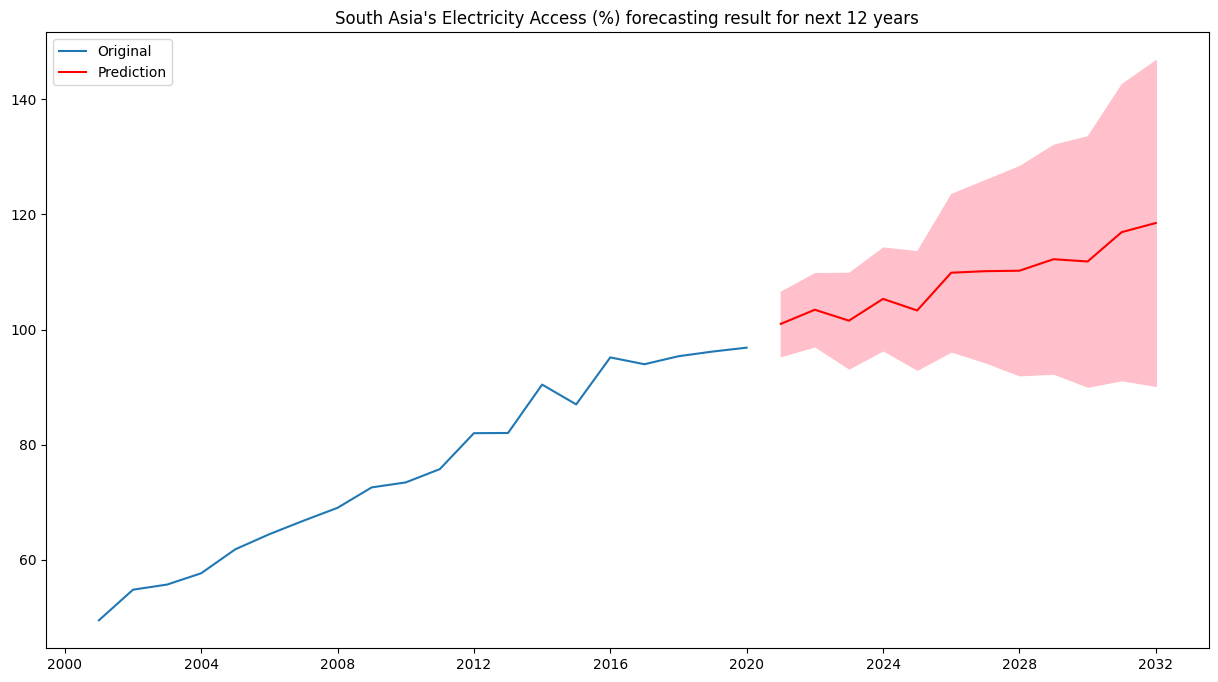

In [75]:
# Plot the actual, including the predicted future values
plt.figure(figsize=(15, 8))
plt.plot(df_e[val1])
plt.plot(predict_mean, color='red')
plt.title(f"{region}'s {val1} forecasting result for next {predict_count} years")
plt.fill_between(predict_ci.index, predict_ci.iloc[:, 0], predict_ci.iloc[:, 1], color='pink')
plt.legend(['Original','Prediction'],loc='upper left')
plt.show()

c:\Users\nadda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


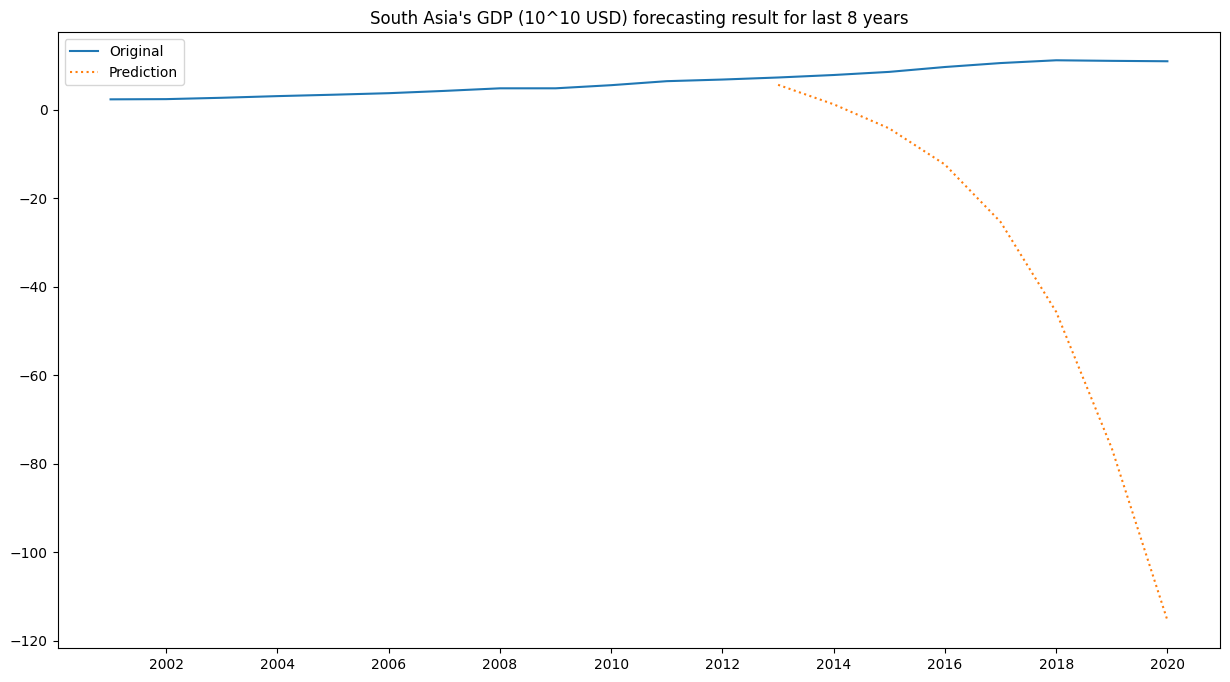

In [76]:
modelg = SARIMAX(trained_dfg.dropna(), order=(pg,dg,qg), seasonal_order=(Pg,Dg,Qg,g_period))
resultg = modelg.fit()

# Predict the last 5 values
predict_count = 8
predict_values = resultg.predict(start = 20-predict_count, end= 19, dynamic= True)  

# Plot the actual and the predicted values
fig = plt.figure(figsize=(15,8)) 
plt.plot(df_g[val2])              
plt.plot(df_g.index[-predict_count:], predict_values, ':')
plt.title(f"{region}'s {val2} forecasting result for last {predict_count} years")
plt.legend(['Original','Prediction'],loc='upper left')
plt.show()

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
actual_values = df_g[val2][-predict_count:]
mae = mean_absolute_error(actual_values, predict_values)
mse = mean_squared_error(actual_values, predict_values)
rmse = np.sqrt(mse)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 43.737232067845596
MSE: 3608.478294086216
RMSE: 60.07061090155665


In [78]:
# Predict the future values
modelg = SARIMAX(trained_dfg.dropna(), order=(pg,dg,qg), seasonal_order=(Pg,Dg,Qg,g_period))
resultg = modelg.fit()

# Predict the next 12 values.  Each value is monthly-sampled
predict_count = 12
predict_values = resultg.get_forecast(steps=predict_count)
predict_mean = predict_values.predicted_mean
predict_ci = predict_values.conf_int()
predict_mean

c:\Users\nadda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


2021-01-01     10.885904
2022-01-01     10.308302
2023-01-01      8.412521
2024-01-01      4.150981
2025-01-01     -0.988589
2026-01-01     -7.355648
2027-01-01    -15.456969
2028-01-01    -26.920293
2029-01-01    -43.408611
2030-01-01    -62.803011
2031-01-01    -85.842764
2032-01-01   -113.078902
Freq: AS-JAN, Name: predicted_mean, dtype: float64

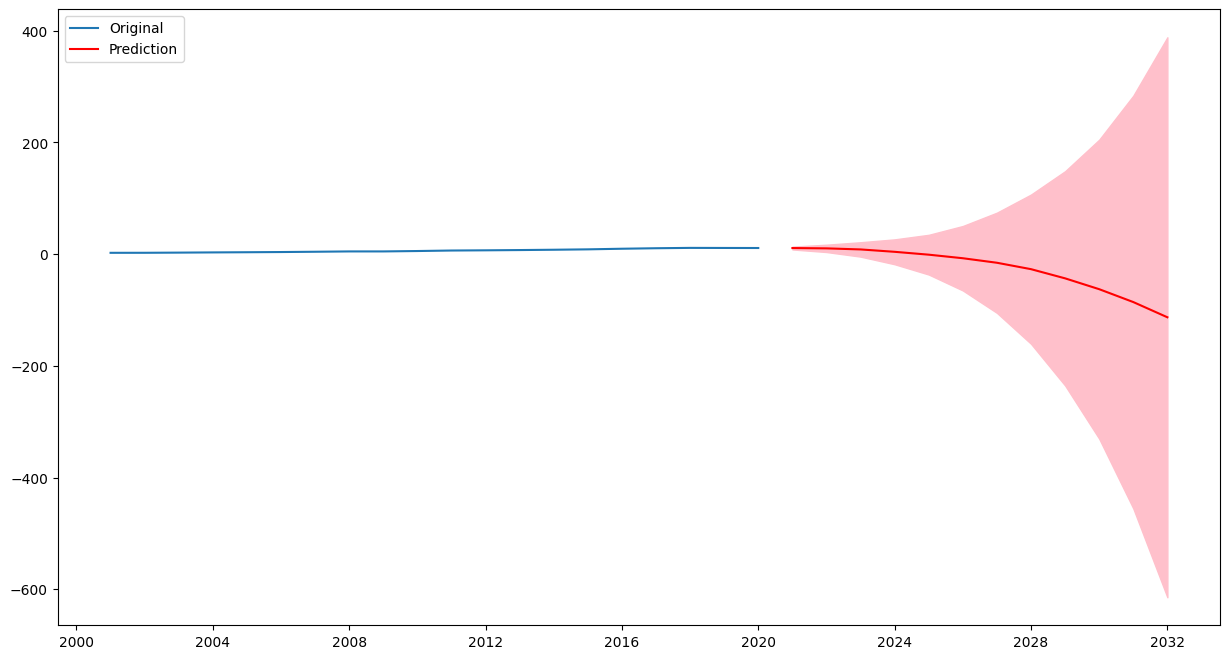

In [79]:
# Plot the actual, including the predicted future values
plt.figure(figsize=(15, 8))
plt.plot(df_g[val2])
plt.plot(predict_mean, color='red')
plt.fill_between(predict_ci.index, predict_ci.iloc[:, 0], predict_ci.iloc[:, 1], color='pink')
plt.legend(['Original','Prediction'],loc='upper left')
plt.show()